In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Some Correlated Data

In [2]:
X = np.linspace(0, 100, 50, endpoint=True)
y = 2*X + np.random.normal(0, 5, size=len(X)) 

Text(0, 0.5, 'y')

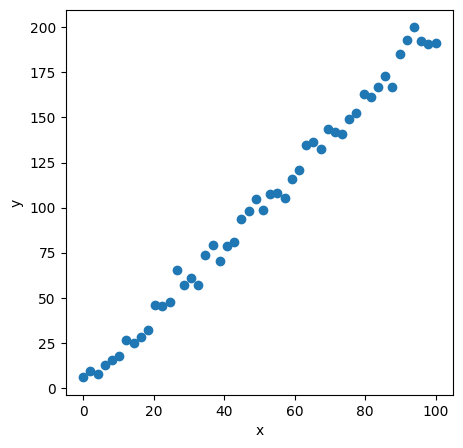

In [3]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')

# Linear Regression

The linear regression model is based on 
$$y = w*X + b$$
where $y$ is the dependent variable, $X$ is the independent variable / feature, $w$ is the slope / weight and $b$ is the intercept / bias.

**Popular Metrics for Evaluating the Model (Goodness of Fit):**

- Sum of Squared Residuals (SSR)
- Mean Squared Error (MSE)
- $R^2 = \frac{SSR(mean) - SSR(fit)}{SSR(mean)} =$ square of Pearson correlation coefficient
- $p$-value for parameter significant

$R^2$ is between 0 and 1, and the higher the better.

# Initialize Weight and Bias

I am initializing them based on the slope from highest and lowest given points, and given $y$ for $X \sim 0$, respectively.

In [4]:
weight = (np.max(y) - np.min(y)) / (X[np.argmax(y)] - X[np.argmin(y)])
weight

2.067488343551436

In [5]:
bias = y[np.min(np.where(np.round(X) == 0)[0])]
bias

5.939956938988196

# Define Function to Calculate Mean Squared Error

In [6]:
def MSE(weight, bias):
    pred = np.dot(X, weight) + bias
    MSE = np.average((pred - y)**2)
    return MSE

# Define Function for Gradient Descent

Linear regression has two gradients: one for weight, one for bias. 

$$\frac{d(MSE)}{dw} = -2 \sum_{i=1}^n (x_i (y_i - \hat{y}_i))/n$$
$$\frac{d(MSE)}{db} = -2 \sum_{i=1}^n (y_i - \hat{y}_i)/n$$

In [7]:
def grad_descent(w, b, lr=0.0001):
    pred = np.dot(X, weight) + bias
    
    ddw = -2*np.average(X*(y - pred))
    ddb = -2*np.average(y - pred)

    w = w - lr*ddw
    b = b - lr*ddb

    err = MSE(w, b)

    return w, b, err

# Run All Epochs to Find Best Parameters

In [8]:
for epoch in range(10000):
    weight, bias, error = grad_descent(weight, bias)
    if epoch % 1000 == 0:
        print(f'Iteration {epoch}, MSE {error}.')

Iteration 0, MSE 42.77785507758683.
Iteration 1000, MSE 33.53021026774053.
Iteration 2000, MSE 32.87681713558206.
Iteration 3000, MSE 32.28737960451354.
Iteration 4000, MSE 31.755637555305924.
Iteration 5000, MSE 31.27594362339263.
Iteration 6000, MSE 30.843203221053997.
Iteration 7000, MSE 30.452820430366547.
Iteration 8000, MSE 30.10064919227245.
Iteration 9000, MSE 29.78294927337401.


# Plot the Best Fit Line

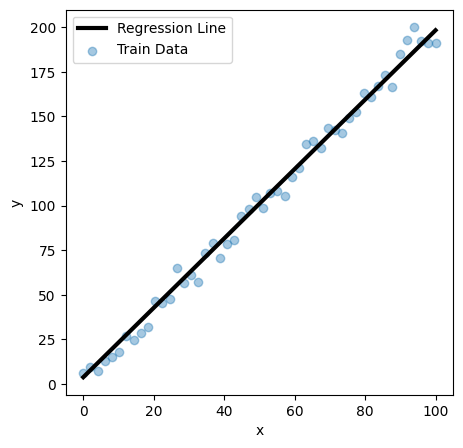

In [9]:
pred = np.dot(X, weight) + bias

fig = plt.figure(figsize=(5, 5))
plt.plot(X, pred, '-k', linewidth=3, label='Regression Line')
plt.scatter(X, y, alpha=0.4, label='Train Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# A Neater Approach With OOP

In [10]:
class LinearRegressionEstimator():
    def __init__(self, lr=0.0001, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        self.error = None
    
    def initialize_parameters(self, X, y):

        self.w = (np.max(y) - np.min(y)) / (X[np.argmax(y)] - X[np.argmin(y)])

        indices = np.where(np.round(X) == 0)[0]
        if indices.size > 0:
            self.b = y[np.min(indices)]
        else:
            self.b = np.average(y)

        self.error = 0

    def update_MSE(self, X, y):
        pred = self.predict(X)
        self.error = np.average((pred - y)**2)
    
    def grad_descent(self, X, y):
        pred = self.predict(X)
        
        ddw = -2*np.average(X*(y - pred))
        ddb = -2*np.average(y - pred)

        self.w = self.w - self.lr*ddw
        self.b = self.b - self.lr*ddb

        self.update_MSE(X, y)
    
    def fit(self, X, y):

        self.initialize_parameters(X, y)

        for _ in range(self.epochs):
            self.grad_descent(X, y)

    def predict(self, X):
        return np.dot(X, self.w) + self.b
    
    def return_parameters(self):
        print(f'Weight is {self.w}, bias is {self.b}, MSE is {self.error}.')
        return self.w, self.b

In [11]:
linreg = LinearRegressionEstimator(lr=0.0001, epochs=10000)
linreg.fit(X, y)

In [12]:
weight, bias = linreg.return_parameters()

Weight is 1.9454149413556403, bias is 3.7800641414674208, MSE is 29.49661865142124.


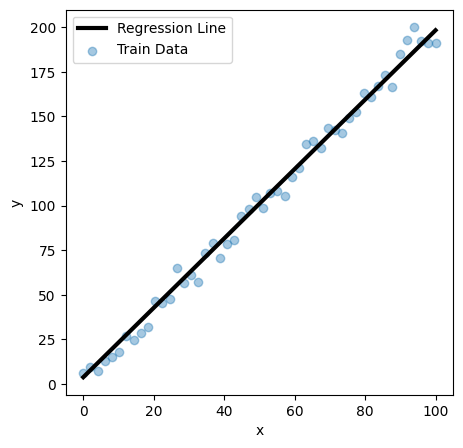

In [13]:
pred = linreg.predict(X)

fig = plt.figure(figsize=(5, 5))
plt.plot(X, pred, '-k', linewidth=3, label='Regression Line')
plt.scatter(X, y, alpha=0.4, label='Train Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Make Some New X, y for Prediction Using Similar Scheme As Train Data

(Could have split data into test and train instead of doing this)

In [14]:
X_test = np.linspace(105, 130, 7, endpoint=True)
y_test = 2*X_test + np.random.normal(0, 5, size=len(X_test))

In [15]:
predictions = linreg.predict(X_test)
print(f"MSE: {np.average((predictions - y_test)**2)}")

MSE: 33.7866107257558


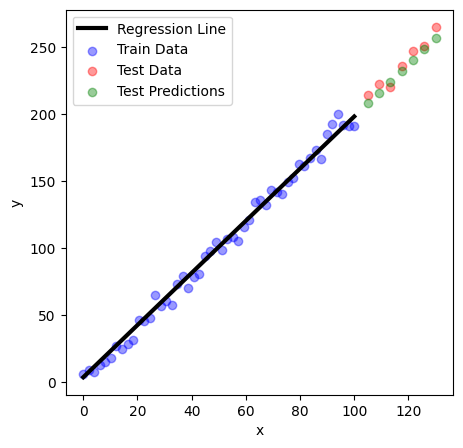

In [16]:
fig = plt.figure(figsize=(5, 5))
plt.plot(X, pred, '-k', linewidth=3, label='Regression Line')
plt.scatter(X, y, alpha=0.4, c='b', label='Train Data')
plt.scatter(X_test, y_test, alpha=0.4, c='r', label='Test Data')
plt.scatter(X_test, predictions, alpha=0.4, c='g', label='Test Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()